# Get the data from alpha_vantage API

API Documentation: https://www.alphavantage.co/documentation/

Python Module Package: https://github.com/RomelTorres/alpha_vantage

In [12]:
import pandas as pd
import datetime
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances

#You won't see my api key :D
with open ('private_info/alphavantage_api_key.txt', "r") as f:
    for line in f:
        for word in line.split():
            my_key = word 
av_api_key = my_key

aTicker='^RUT'
ts = TimeSeries(key=av_api_key, output_format='pandas', indexing_type='date')
ts_data, ts_meta_data = ts.get_intraday(symbol=aTicker, interval='60min', outputsize='full')

ti = TechIndicators(key=av_api_key, output_format='pandas')
ti_data, ti_meta_data =  ti.get_macd(symbol=aTicker, interval='daily', fastperiod=12, slowperiod=26, signalperiod=9)

sp = SectorPerformances(key='av_api_key', output_format='pandas')
sp_data, sp_meta_data = sp.get_sector()

## Sector Performace Overview

In [13]:
sp_data.head(5)

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
Communication Services,0.0147,0.0076,0.0493,-0.0106,-0.0749,0.0463,-0.1142,-0.0189,-0.0586,0.3206
Consumer Discretionary,0.0110,0.0236,0.0573,-0.0310,-0.0890,0.0459,0.0080,0.3559,0.5628,3.5268
Consumer Staples,0.0101,-0.0028,0.0110,-0.0714,-0.0443,0.0070,-0.1063,0.0232,0.2077,1.1211
Energy,0.0098,0.0129,0.0639,-0.0532,-0.2139,0.0591,-0.1899,0.0356,-0.3003,0.0937
Financials,-0.0041,0.0023,0.0291,-0.0467,-0.1325,0.0191,-0.1450,0.2962,0.3658,1.3679


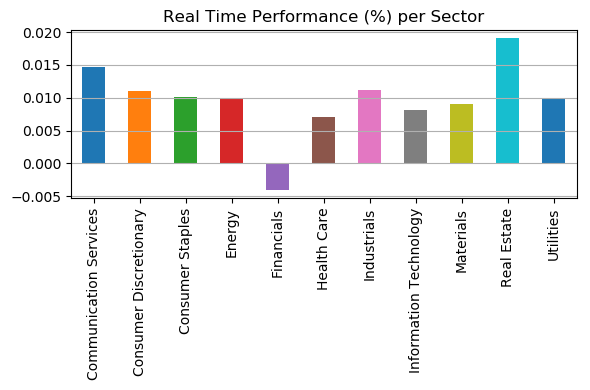

In [14]:
import matplotlib.pyplot as plt

plt.figure(dpi=100)
sp_data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

##   Time Series Data

In [15]:
start_datetime = '2018-06-01 09:30:00'
mask = (ts_data.index > start_datetime)
ts_data = ts_data.loc[mask]
ts_data.head(5)
# Older data not available???

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2018-10-11 09:30:00,1566.9663,1580.8910,1565.3660,1573.8370,0.0
2018-10-11 10:30:00,1576.1075,1578.5706,1562.9060,1565.8789,0.0
2018-10-11 11:30:00,1565.7369,1579.0479,1563.6976,1578.0240,0.0
2018-10-11 12:30:00,1577.6624,1577.6624,1571.1971,1571.7244,0.0
2018-10-11 13:30:00,1572.1770,1572.5491,1562.7654,1563.2698,0.0


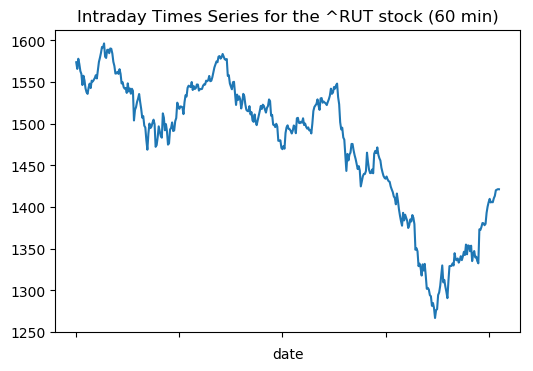

In [17]:
plt.figure(dpi=100)
ts_data['4. close'].plot()
plt.title('Intraday Times Series for the '+aTicker+' stock (60 min)')
plt.show()

## Tech Indicator Data

In [18]:
start_date = '2018-01-01'
mask = (ti_data.index >= start_date)
ti_data = ti_data.loc[mask]
ti_data.head(5)

,MACD_Signal,MACD,MACD_Hist
date,,,
2018-01-02,9.5533,9.7128,0.1595
2018-01-03,9.6477,10.0255,0.3778
2018-01-04,9.7995,10.4067,0.6072
2018-01-05,10.0254,10.9291,0.9036
2018-01-08,10.2918,11.3573,1.0655


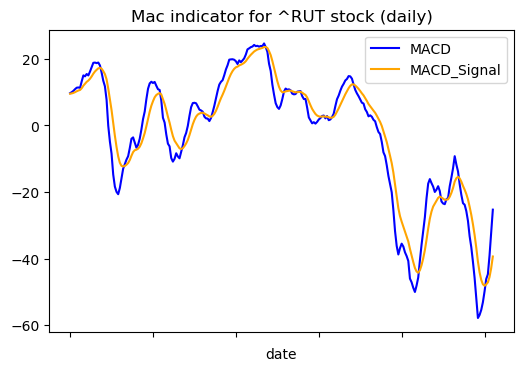

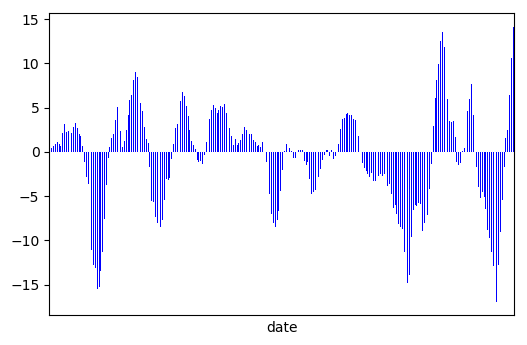

In [29]:
import matplotlib.dates as mdates

plt.figure(dpi=100)
ti_data['MACD'].plot(label='MACD', color='blue')
ti_data['MACD_Signal'].plot(label='MACD_Signal', color='orange')

plt.title('Mac indicator for ' +aTicker +' stock (daily)')
#plt.ylim(-3,3)
plt.legend()
plt.show()

fig = plt.figure(dpi=100)
ti_data['MACD_Hist'].plot(label='MACD_Hist', color='blue', kind='bar')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

**ToDO: Fix the data axis tick**

In [54]:
a= ti_data['MACD_Hist'].values[-2]


In [55]:
type(a)

numpy.float64

In [57]:
a>0

True

In [59]:
flags = [False, False]


In [60]:
flags

[False, False]